# Exploring Cheese

### Looking for Insights from Cheese Information from cheese.com

<img src=https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/pic1.png>

Hey there! I'll be looking at data about cheese to practice some skills with Jupyter Notebooks and Pandas.  This will be focusing heavily on creating visuals that answer/raise questions vs making a pretty presentation.  Unfortunately, there isn't much in the way of numbers in this dataset, but we press on anyway.

In [1100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Original data before any cleaning: 
https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv

Data after doing most of the needed cleaning in Excel Power Query:

In [1103]:
df = pd.read_csv("https://raw.githubusercontent.com/blakedenman2/Data_Analysis_Projects_and_Practice/main/Python/Exploring%20Cheese/ExcelCleanedCheeseData.csv")

In [1104]:
df.head()

,cheese,milk,country,region,family,type1,type2,type3,fat_content,calcium (mg/100g),...,texture3,rind,color,flavor1,flavor2,flavor3,aroma1,aroma2,aroma3,producers
0,Aarewasser,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,NaN,NaN,...,NaN,washed,yellow,sweet,NaN,NaN,buttery,NaN,NaN,Jumi
1,Abbaye de Belloc,sheep,France,Pays Basque,NaN,semi-hard,artisan,NaN,NaN,NaN,...,firm,natural,yellow,burnt caramel,NaN,NaN,lanoline,NaN,NaN,NaN
2,Abbaye de Belval,cow,France,NaN,NaN,semi-hard,NaN,NaN,40-46%,NaN,...,NaN,washed,ivory,NaN,NaN,NaN,aromatic,NaN,NaN,NaN
3,Abbaye de Citeaux,cow,France,Burgundy,NaN,semi-soft,artisan,brined,NaN,NaN,...,smooth,washed,white,acidic,milky,smooth,barnyardy,earthy,NaN,NaN
4,Abbaye de Tamié,cow,France,Savoie,NaN,soft,artisan,NaN,NaN,NaN,...,smooth,washed,white,fruity,nutty,NaN,perfumed,pungent,NaN,NaN


The "fat_content" column still needs to be cleaned up so values that are not NaN are all in %.

In [1106]:
# Convert to string to iterate over
df["fat_content"] = df["fat_content"].astype(str)

# Average the fat content when given as a range, divide those given per 100g, then convert all to %
for i in df.index:
    value = df.at[i,"fat_content"]
    value = value.strip()
    if "-" in value:
        value = value.replace("-", "+").rstrip("%")
        df.at[i, "fat_content"] = str(round(eval(value) / 2))
    elif "g" in value:
        value = value.replace(" ", "").replace("g", "")
        df.at[i, "fat_content"] = str(round(eval(value)*100))
    else:
        try:
            value = float(value)
            df.at[i, "fat_content"] = str(round(value*100))
        except ValueError:
            pass

# Rename column
df.rename(columns={"fat_content":"fat_content (%)"}, inplace = True)

In [1107]:
# Checking to see how it went
print(df["fat_content (%)"].value_counts())

fat_content (%)
nan    903
45      53
50      28
48      13
40      13
34      11
25       9
30       8
26       7
27       6
28       6
60       6
20       5
12       5
8        5
55       5
35       5
43       4
32       4
18       3
38       3
21       3
37       3
51       3
22       3
14       3
42       2
31       2
54       2
46       2
52       2
0        1
73       1
5        1
13       1
23       1
17       1
70       1
33       1
24       1
53       1
10       1
75       1
7        1
11       1
62       1
41       1
36       1
Name: count, dtype: int64


In [1108]:
# Now we should be ready to start visualizing
df.head()

,cheese,milk,country,region,family,type1,type2,type3,fat_content (%),calcium (mg/100g),...,texture3,rind,color,flavor1,flavor2,flavor3,aroma1,aroma2,aroma3,producers
0,Aarewasser,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,nan,NaN,...,NaN,washed,yellow,sweet,NaN,NaN,buttery,NaN,NaN,Jumi
1,Abbaye de Belloc,sheep,France,Pays Basque,NaN,semi-hard,artisan,NaN,nan,NaN,...,firm,natural,yellow,burnt caramel,NaN,NaN,lanoline,NaN,NaN,NaN
2,Abbaye de Belval,cow,France,NaN,NaN,semi-hard,NaN,NaN,43,NaN,...,NaN,washed,ivory,NaN,NaN,NaN,aromatic,NaN,NaN,NaN
3,Abbaye de Citeaux,cow,France,Burgundy,NaN,semi-soft,artisan,brined,nan,NaN,...,smooth,washed,white,acidic,milky,smooth,barnyardy,earthy,NaN,NaN
4,Abbaye de Tamié,cow,France,Savoie,NaN,soft,artisan,NaN,nan,NaN,...,smooth,washed,white,fruity,nutty,NaN,perfumed,pungent,NaN,NaN



Looks Good!  Lots of NaN, but let's see what we can find in the data.

In [1110]:
plt.style.use("seaborn-v0_8-paper")

In [1111]:
df["milk"].value_counts()

milk
cow              765
goat             216
sheep            128
water buffalo     14
buffalo           10
plant-based        6
yak                2
camel              1
moose              1
donkey             1
Name: count, dtype: int64

As would be expected, most cheeses come from cow milk, with goat and sheep rounding out the top three.  Moose milk cheese is an interesting concept!

In [1113]:
df["fat_content (%)"] = pd.to_numeric(df["fat_content (%)"], errors="coerce")
fatgroup = df.groupby(["milk"]).agg({"fat_content (%)":["count", "mean"]})
fatgroup = fatgroup.round()
fatgroup

fat_content (%)      
                        count  mean
milk                               
buffalo                     1  26.0
camel                       1  22.0
cow                       179  39.0
donkey                      0   NaN
goat                       40  35.0
moose                       1  12.0
plant-based                 0   NaN
sheep                      17  42.0
water buffalo               2  33.0
yak                         0   NaN

Average fat content for different types of milk - the data for fat content (%) is better with more our more common milk types.

<Axes: title={'center': 'Fat Content % in Cheeses by Milk Type'}, xlabel='Milk Type', ylabel='Fat Content (%)'>

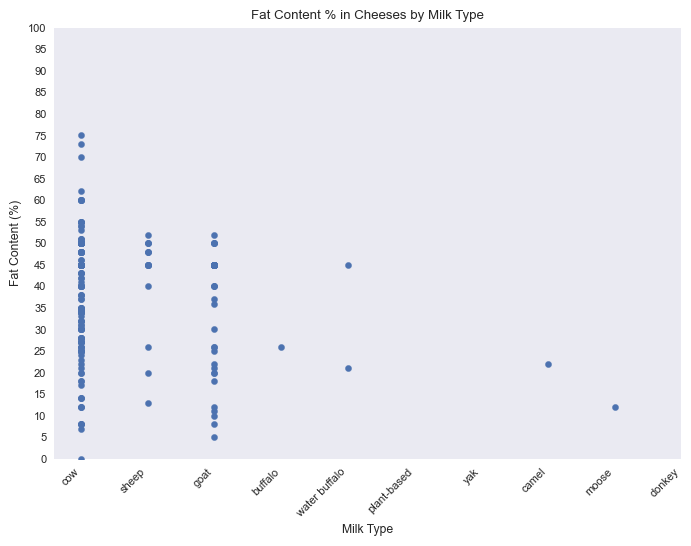

In [1115]:
df["fat_content (%)"] = pd.to_numeric(df["fat_content (%)"], errors='coerce')
scat = df.plot.scatter(x = "milk", y = "fat_content (%)",xlabel = "Milk Type", ylabel = "Fat Content (%)", title = "Fat Content % in Cheeses by Milk Type")
scat.set_ylim(0, 100)
scat.set_yticks(range(0, 101, 5))
scat.set_xticks(scat.get_xticks())
scat.set_xticklabels(scat.get_xticklabels(), rotation=45, ha='right')
scat

In [1116]:
df["calcium (mg/100g)"] = pd.to_numeric(df["calcium (mg/100g)"], errors="coerce")
calgroup = df.groupby(["milk"]).agg({"calcium (mg/100g)":["count", "mean"]})
calgroup = calgroup.round()
calgroup

calcium (mg/100g)        
                          count    mean
milk                                   
buffalo                       0     NaN
camel                         0     NaN
cow                          21   663.0
donkey                        0     NaN
goat                          1   318.0
moose                         0     NaN
plant-based                   0     NaN
sheep                         1  1050.0
water buffalo                 1   316.0
yak                           0     NaN

There is very little calcium data, let's see what it looks like plotted just for kicks.

<Axes: title={'center': 'Mg/100g of Calcium in Cheeses by Milk Type'}, xlabel='Milk Type', ylabel='Calcium (mg/100g)'>

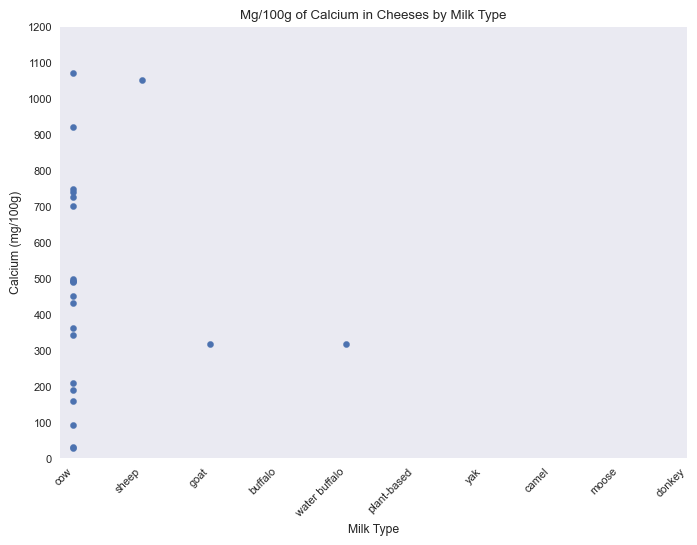

In [1118]:
df["calcium (mg/100g)"] = pd.to_numeric(df["calcium (mg/100g)"], errors='coerce')
scat = df.plot.scatter(x = "milk", y = "calcium (mg/100g)",xlabel = "Milk Type", ylabel = "Calcium (mg/100g)", title = "Mg/100g of Calcium in Cheeses by Milk Type")
scat.set_ylim(0, 1200)
scat.set_yticks(range(0, 1201, 100))
scat.set_xticks(scat.get_xticks())
scat.set_xticklabels(scat.get_xticklabels(), rotation=45, ha='right')
scat

Not much can really be inferred from this, same as with the fat content chart. The data isn't complete enough, and doesn't seems to show any sort of meaningful pattern regardless.

<Axes: title={'center': 'Count of Cheeses by Country'}, xlabel='Country', ylabel='Count'>

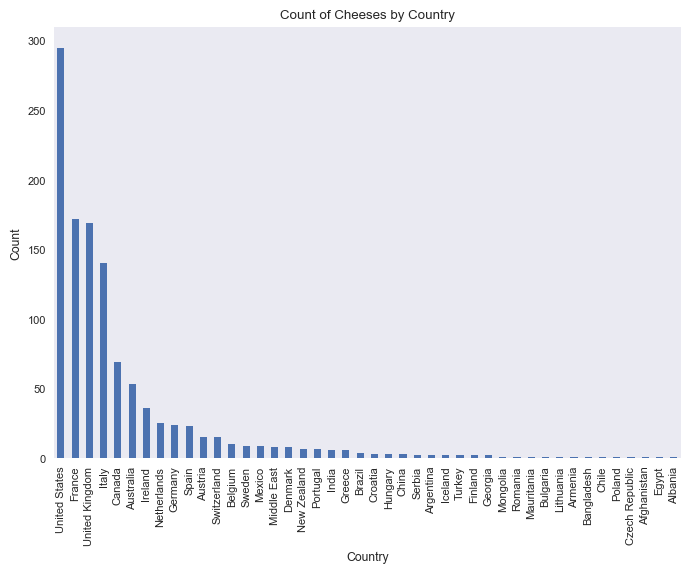

In [1120]:
country_count = df["country"].value_counts()
country_count_df = country_count.reset_index()
country_count_df.columns = ["country", "count"]
country_count_bar = country_count_df.plot(kind ="bar", x ="country", y = "count", legend = False, stacked = True)
country_count_bar.set(xlabel = "Country", ylabel = "Count", title = "Count of Cheeses by Country")
country_count_bar

Most cheeses seem to originate in western countries.  It would be interesting to know if this is true or if the website this cheese data comes from is primarily focused on cheeses their audience is familiar with.

<Figure size 1000x600 with 0 Axes>

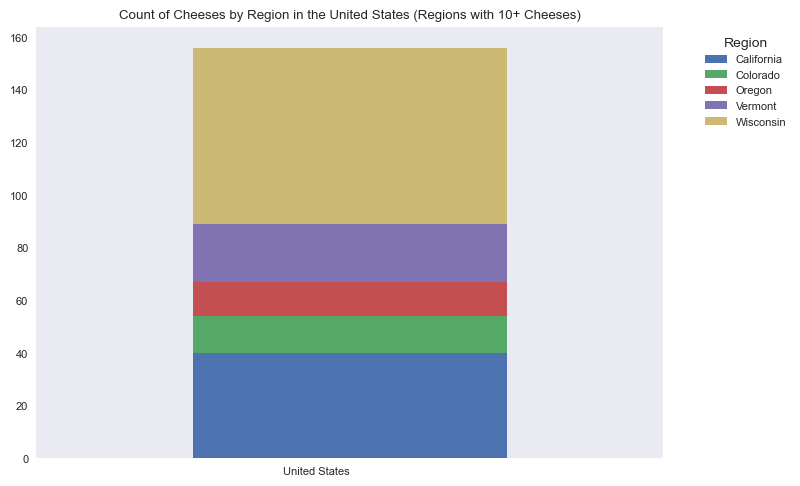

In [1122]:
topcountries = df[df["country"].isin(["United States"])]
region_count = topcountries.groupby(["country", "region"]).size()
filtered_region_count = region_count[region_count >= 10]
filtered_region_count_df = filtered_region_count.unstack(fill_value=0)

plt.figure(figsize=(10, 6))
filtered_region_count_df.plot(kind="bar", stacked=True)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Count of Cheeses by Region in the United States (Regions with 10+ Cheeses)")
plt.xticks(rotation=0, ha="right")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Five US states have 10 or more cheeses that originate from within their borders.  Not much of a surprise that Wisconsin is on top.

Cheese.com breaks its cheeses down into families if applicable, another column in the data frame.

<Axes: title={'center': 'Count of Cheeses by Family'}, xlabel='Count', ylabel='Family'>

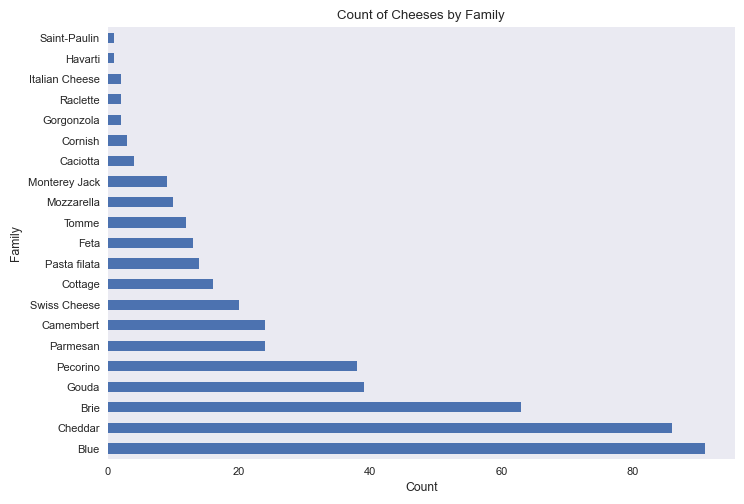

In [1125]:
family_count = df["family"].value_counts()
family_count_df = family_count.reset_index()
family_count_df.columns = ["family", "count"]
family_count_barh = family_count_df.plot(kind ="barh", x ="family", y = "count", legend = False)
family_count_barh.set(ylabel = "Family", xlabel = "Count", title = "Count of Cheeses by Family")
family_count_barh

I suppose mold comes in all different flavors, at least it seems so with all these blue cheeses!

<Axes: title={'center': 'Count of Cheeses by Color'}, xlabel='Count', ylabel='Color'>

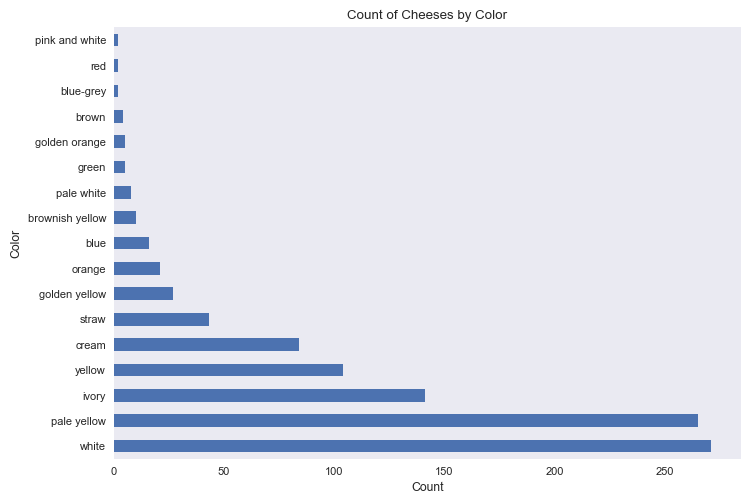

In [1127]:
color_count = df["color"].value_counts()
color_count_df = color_count.reset_index()
color_count_df.columns = ["color", "count"]
color_count_barh = color_count_df.plot(kind ="barh", x ="color", y = "count", legend = False)
color_count_barh.set(ylabel = "Color", xlabel = "Count", title = "Count of Cheeses by Color")
color_count_barh

Even though blue cheeses have the most in a particular cheese "family", far and away the majority of cheeses overall seem to be in the orange-yellow-white color spectrum.

<Axes: title={'center': 'Count of Cheeses by Producer'}, xlabel='Count', ylabel='Producer'>

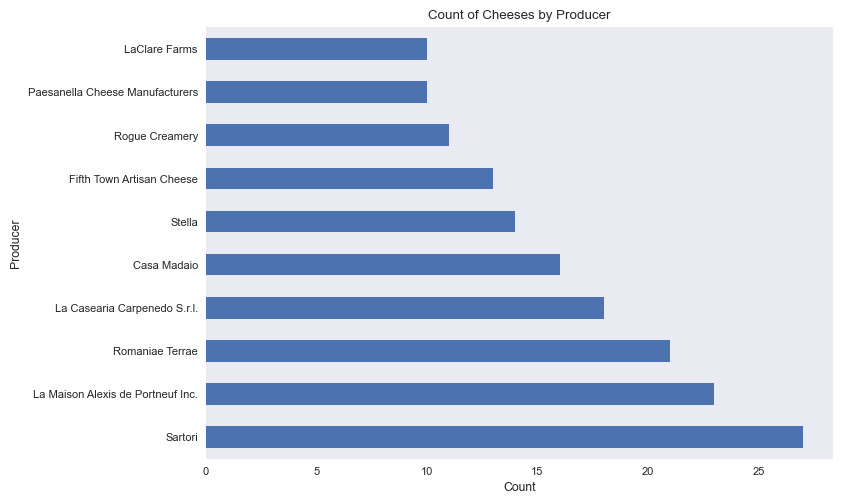

In [1129]:
producer_count = df["producers"].value_counts()

filtered_producer_count = producer_count[producer_count >= 10]

filtered_producer_count_df = filtered_producer_count.reset_index()
filtered_producer_count_df.columns = ["producers", "count"]
filtered_producer_count_barh = filtered_producer_count_df.plot(kind ="barh", x ="producers", y = "count", legend = False)
filtered_producer_count_barh.set(ylabel = "Producer", xlabel = "Count", title = "Count of Cheeses by Producer")
filtered_producer_count_barh

These are the companies producing the most varieties of cheese in the world according to the data.

<Axes: title={'center': 'Count of Cheeses by Rind'}, xlabel='Count', ylabel='Rind'>

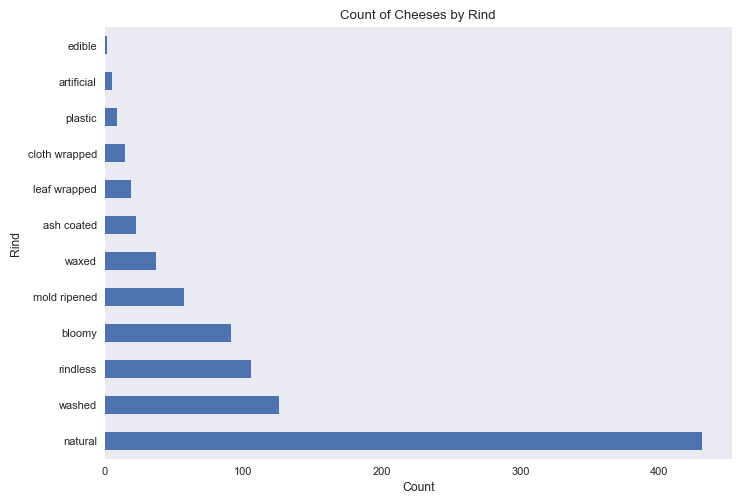

In [1131]:
rind_count = df["rind"].value_counts()
rind_count_df = rind_count.reset_index()
rind_count_df.columns = ["rind", "count"]
rind_count_barh = rind_count_df.plot(kind ="barh", x ="rind", y = "count", legend = False)
rind_count_barh.set(ylabel = "Rind", xlabel = "Count", title = "Count of Cheeses by Rind")
rind_count_barh

Natural rind being the most common makes sense - it would be the easiest to create.
More expensive/fancy cheeses probably have more unique rind styles - like "ash coated" - that sound interesting!

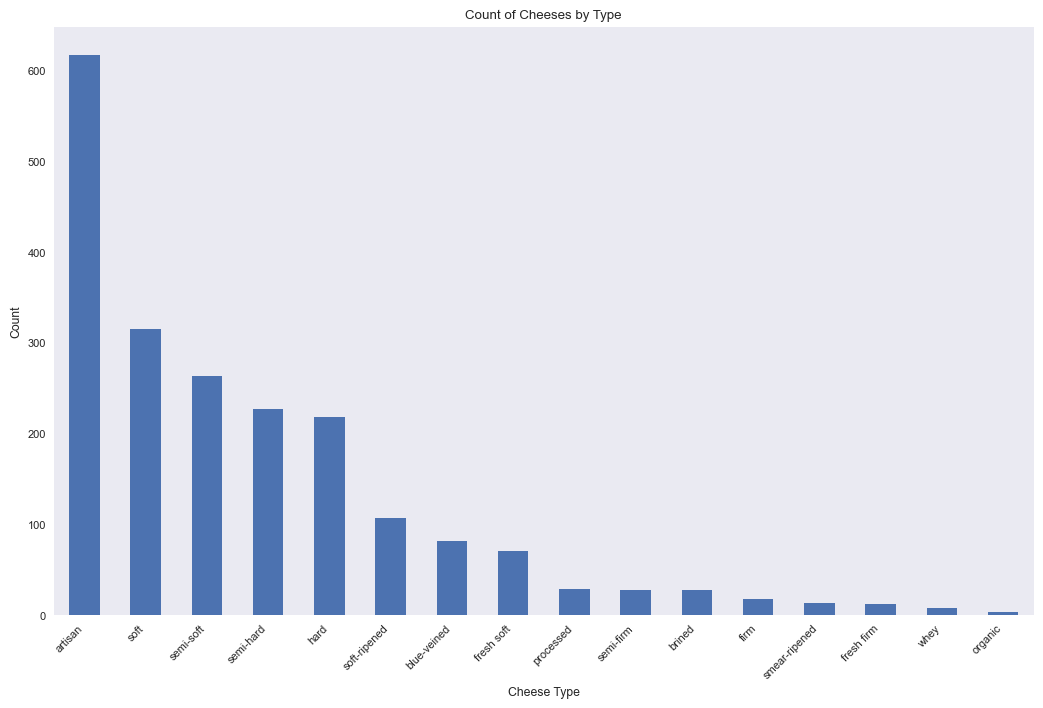

In [1133]:
type_melted_df = df.melt(value_vars=['type1', 'type2', 'type3'], value_name='type').dropna()
type_count = type_melted_df['type'].value_counts()

plt.figure(figsize=(10, 6))
type_count.plot(kind='bar')
plt.xlabel("Cheese Type")
plt.ylabel("Count")
plt.title("Count of Cheeses by Type")
plt.xticks(rotation=45, ha="right")
plt.show()

It is interesting to me that there is a similar distribution of cheeses that are "soft", "semi-soft", "semi-hard", and "hard", of all the cheeses in the dataset.

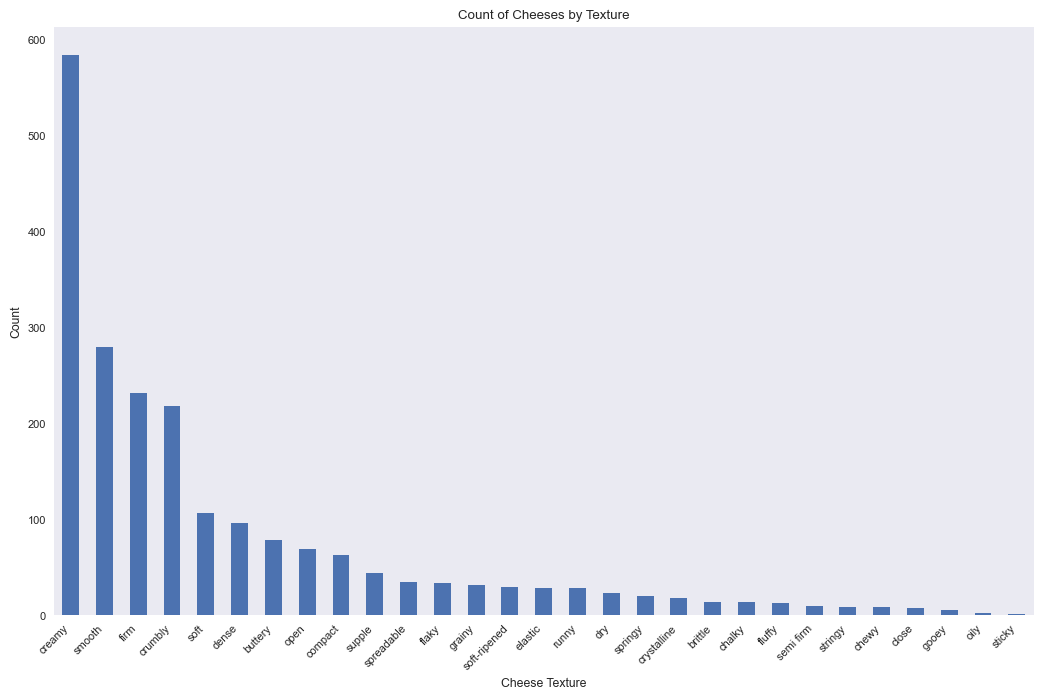

In [1135]:
texture_melted_df = df.melt(value_vars=['texture1', 'texture2', 'texture3'], value_name='texture').dropna()
texture_count = texture_melted_df['texture'].value_counts()

plt.figure(figsize=(10, 6))
texture_count.plot(kind='bar')
plt.xlabel("Cheese Texture")
plt.ylabel("Count")
plt.title("Count of Cheeses by Texture")
plt.xticks(rotation=45, ha="right")
plt.show()

I did not expect creamy to be easily the most common cheese texture!

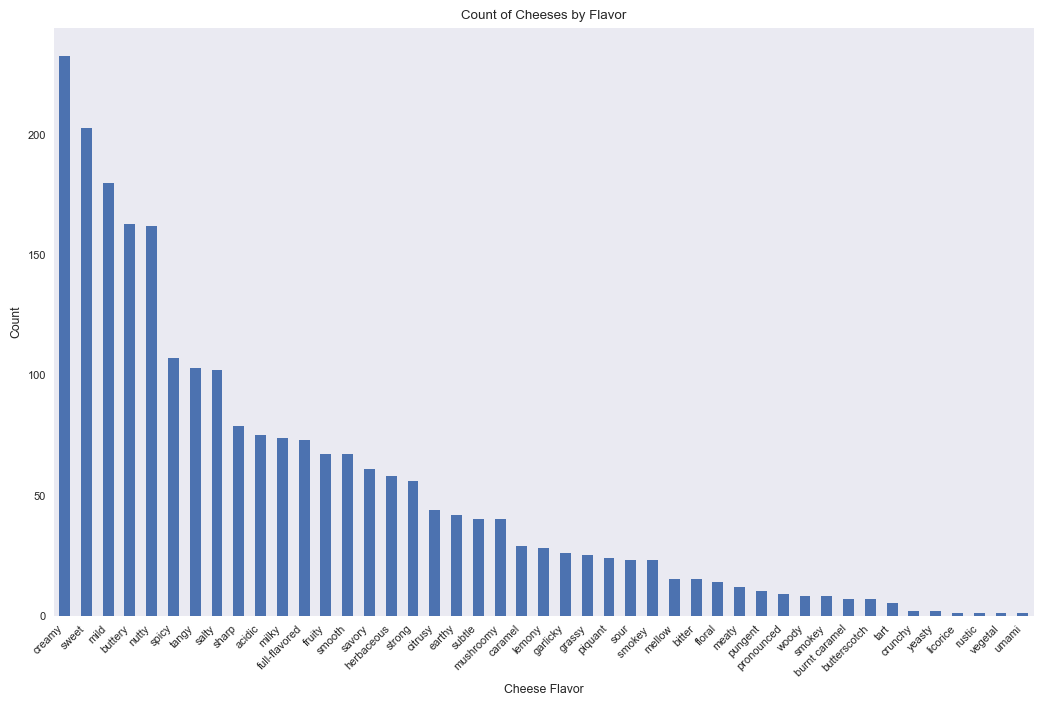

In [1137]:
flavor_melted_df = df.melt(value_vars=['flavor1', 'flavor2', 'flavor3'], value_name='flavor').dropna()
flavor_count = flavor_melted_df['flavor'].value_counts()

plt.figure(figsize=(10, 6))
flavor_count.plot(kind='bar')
plt.xlabel("Cheese Flavor")
plt.ylabel("Count")
plt.title("Count of Cheeses by Flavor")
plt.xticks(rotation=45, ha="right")
plt.show()

I suppose wine and cheese pairings take on a whole new level when you have this many flavors in cheeses.